#1. Pandas

In [72]:
import pandas as pd    #Importing required package.
data_set = pd.read_csv('data_Pandas.csv')  #Reading the file using pandas 
data_set.describe()    #describing the Data_set using function described

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [73]:
#Verifying the null values if any in the dataset & showing result as boolean values.
data_set.isnull().any()  

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [74]:
#Replacing the null values using mean.
data_set.fillna(data_set.mean(), inplace=True) # used inplace to make the changes in data to be persistence across this execution.
data_set.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [75]:
# Using 'agg' function to aggregate the data for two columns
data_set.agg({'Duration':['min','max','count','mean'],'Maxpulse':['min','max','count','mean']}) 

,Duration,Maxpulse
min,15.000000,100.000000
max,300.000000,184.000000
count,169.000000,169.000000
mean,63.846154,134.047337


In [76]:
# Using 'loc' function to group the data set according to the condition given for Calories column/label
data_set.loc[(data_set['Calories']>500)&(data_set['Calories']<1000)] 

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [77]:
#Using 'loc' function to group the data set according to the condition given for Calories column/label
data_set.loc[(data_set['Calories']>500)&(data_set['Pulse']<100)] 

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [78]:
df_modified = data_set[['Duration','Pulse','Calories']]  #Excluded the Maxpulse column from the dataset.
df_modified.head() #Printing the top 5 overview of data set in df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [79]:
del data_set['Maxpulse']    #Deleting the label/column Maxpulse from the dataset
display (data_set)

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [80]:
print(data_set.dtypes)  #Before the conversion of data type for the value in data set
data_set['Calories'] = data_set['Calories'].astype(int)  # Applying conversion of data type for the data in label Calories
data_set.dtypes  #Displaying after conversion

Duration      int64
Pulse         int64
Calories    float64
dtype: object


Duration    int64
Pulse       int64
Calories    int64
dtype: object

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Duration', ylabel='Calories'>

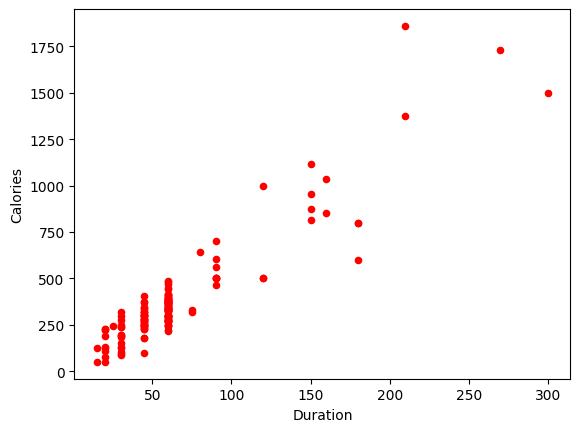

In [81]:
data_set.plot.scatter(x='Duration',y='Calories',c='red') # Displaying the pictorial plot for two column(Duration and calories)

# 1. (Titanic Dataset)

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC,SVC

In [83]:
train_titanic_df = pd.read_csv("train.csv")
test_titanic_df = pd.read_csv("test.csv")
train_titanic_df = train_titanic_df.drop(['Ticket', 'Cabin','Name','PassengerId'], axis=1)
test_titanic_df = test_titanic_df.drop(['Ticket', 'Cabin','Name'], axis=1)

In [84]:
train_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [85]:
genders = {"male": 1, "female": 0}
ports = {"S": 0, "C": 1, "Q": 2}
train_titanic_df['Sex'] = train_titanic_df['Sex'].map(genders)
test_titanic_df['Sex'] = test_titanic_df['Sex'].map(genders)

train_titanic_df['Embarked'] = train_titanic_df['Embarked'].map(ports)

train_titanic_df['Embarked'] = test_titanic_df['Embarked'].map(ports)
train_titanic_df['Age'] = (train_titanic_df.groupby(['SibSp', 'Parch', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median())))
train_titanic_df = train_titanic_df[['Survived','Pclass','Sex','Age','Parch','SibSp','Fare']]
test_titanic_df = test_titanic_df[['Pclass','Sex','Age','Parch','SibSp','Fare']]
train_titanic_df.dropna(inplace=True)
titanic_df = train_titanic_df
X=titanic_df.drop(['Survived'],axis=1)
y=titanic_df['Survived']

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-85-a933785fb8ca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_titanic_df.dropna(inplace=True)


In [86]:
train_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Sex       884 non-null    int64  
 3   Age       884 non-null    float64
 4   Parch     884 non-null    int64  
 5   SibSp     884 non-null    int64  
 6   Fare      884 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 55.2 KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Pclass'}>, <Axes: >]], dtype=object)

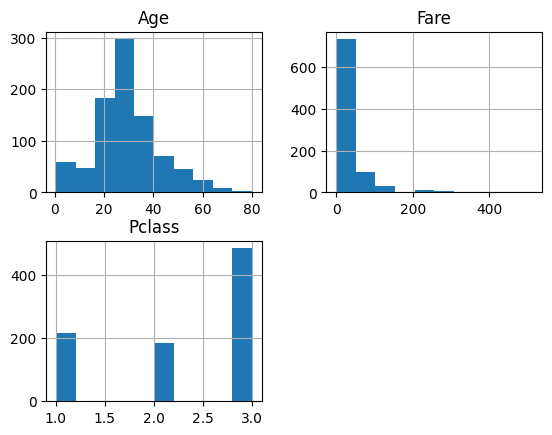

In [88]:
titanic_df.hist(['Age','Fare','Pclass'])

In [89]:
titanic_df[['Survived','Sex']].corr()

,Survived,Sex
Survived,1.000000,-0.548066
Sex,-0.548066,1.000000


***CONCLUSION:***

Correlation Relation Between Survived and Sex:

-0.548066 - A moderate negative (downhill sloping) relationship The correlation is clearly seen when the Sex (Male, Female) changes the survival chances changes because, When Sex is Female , there is a high chance of Survival and vice versa

Therefore, Sex is an Important Feature for the Survival chances


***Visualization:***

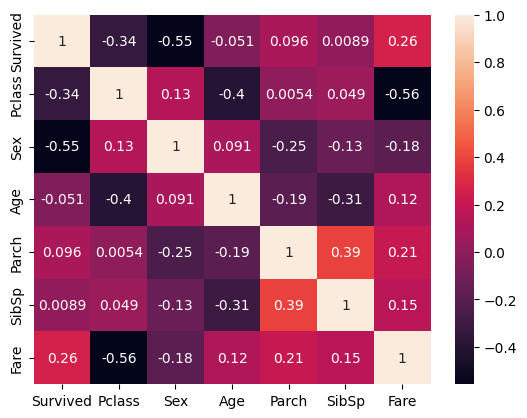

In [54]:
sns.heatmap(titanic_df.corr(), annot=True)
plt.show()

<ipython-input-56-f7247a2855ed>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
<ipython-input-56-f7247a2855ed>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==0].A

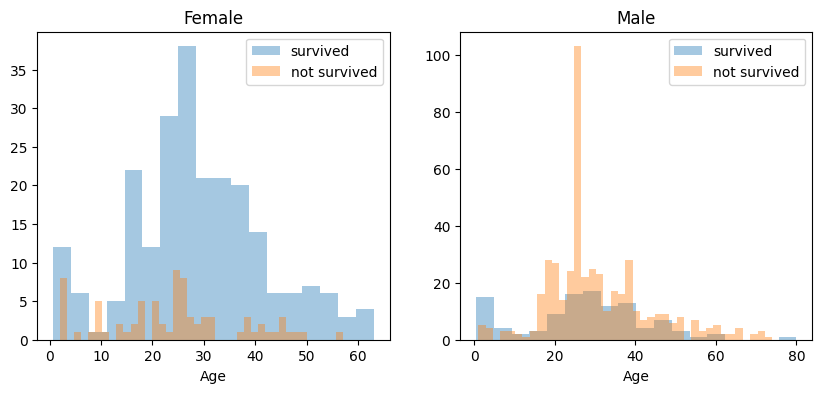

In [56]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_df[titanic_df['Sex']==0]
men = titanic_df[titanic_df['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [91]:
accuracy_score(y_test,y_pred)

0.7737556561085973

#2. (GLASS DATASET)

In [92]:
glass_df = pd.read_csv("glass.csv")

In [93]:
y=glass_df["Type"]
X=glass_df.drop(["Type"],axis=1)

In [94]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Implementing Naive Bayes method

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [96]:
accuracy_score(y_test,y_pred)

0.46296296296296297

In [97]:
classification_report(y_test, y_pred,output_dict=True,zero_division=1)

{'1': {'precision': 0.32142857142857145,
  'recall': 0.6428571428571429,
  'f1-score': 0.4285714285714286,
  'support': 14},
 '2': {'precision': 0.45454545454545453,
  'recall': 0.20833333333333334,
  'f1-score': 0.28571428571428575,
  'support': 24},
 '3': {'precision': 0.5,
  'recall': 0.4,
  'f1-score': 0.4444444444444445,
  'support': 5},
 '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '6': {'precision': 0.6666666666666666,
  'recall': 1.0,
  'f1-score': 0.8,
  'support': 2},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 'accuracy': 0.46296296296296297,
 'macro avg': {'precision': 0.49044011544011545,
  'recall': 0.5418650793650793,
  'f1-score': 0.4931216931216931,
  'support': 54},
 'weighted avg': {'precision': 0.4859708193041526,
  'recall': 0.46296296296296297,
  'f1-score': 0.438506760728983,
  'support': 54}}

In [65]:
svc = SVC(max_iter=500000)
y_pred = svc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,y_pred)

0.25925925925925924

In [66]:
classification_report(y_test, y_pred,output_dict=True,zero_division=1)

{'1': {'precision': 0.25925925925925924,
  'recall': 1.0,
  'f1-score': 0.4117647058823529,
  'support': 14},
 '2': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 24},
 '3': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5},
 '5': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '6': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '7': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7},
 'accuracy': 0.25925925925925924,
 'macro avg': {'precision': 0.8765432098765432,
  'recall': 0.16666666666666666,
  'f1-score': 0.06862745098039215,
  'support': 54},
 'weighted avg': {'precision': 0.8079561042524006,
  'recall': 0.25925925925925924,
  'f1-score': 0.10675381263616558,
  'support': 54}}

Implementing SVM method

In [67]:
linear_svc = LinearSVC(max_iter=500000)
y_pred = linear_svc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,y_pred)

0.5925925925925926

In [68]:
classification_report(y_test, y_pred,output_dict=True,zero_division=1)

{'1': {'precision': 0.48,
  'recall': 0.8571428571428571,
  'f1-score': 0.6153846153846153,
  'support': 14},
 '2': {'precision': 0.631578947368421,
  'recall': 0.5,
  'f1-score': 0.5581395348837209,
  'support': 24},
 '3': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5},
 '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '6': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 2},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 'accuracy': 0.5925925925925926,
 'macro avg': {'precision': 0.6019298245614034,
  'recall': 0.4761904761904762,
  'f1-score': 0.445587358378056,
  'support': 54},
 'weighted avg': {'precision': 0.6458869395711502,
  'recall': 0.5925925925925926,
  'f1-score': 0.5557543231961837,
  'support': 54}}

In [69]:
glass_df.corr().style.background_gradient(cmap="Blues")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: ylabel='Count'>

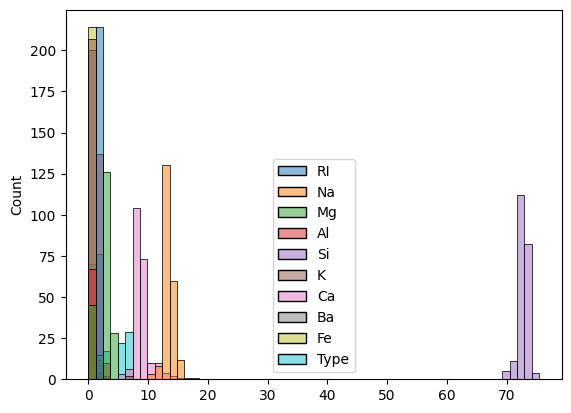

In [70]:
sns.histplot(glass_df)



On Glass Dataset:

Linear SVC has the better Accuracy than SVC and Naïve Bayes method

SVMs are different from other Naive Bayes algorithm because of the way they choose the decision boundary that maximizes the distance from the nearest data points of all the classes. The decision boundary created by SVMs is called the maximum margin classifier or the maximum margin hyper plane.
